# Research Skills: Image Analysis 
## Take-home Assignment - Part 2 and 3
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Academic Year 2022-2023

Your First Name:Ela 

Your Last Name: Guven

Your Student ID: 2067608

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

In [245]:
!pip install --user imageio
!pip install --user scikit-image

## Part 2: Extracting vessels from raw fundus images

1. (5 points) Load the color image. Using subplots, display each color channel separately.

   Points breakdown: 2 points for loading the image and 3 points for displaying with titles.

   **Display the image with an appropriate title.**

(-0.5, 1499.5, 798.5, -0.5)

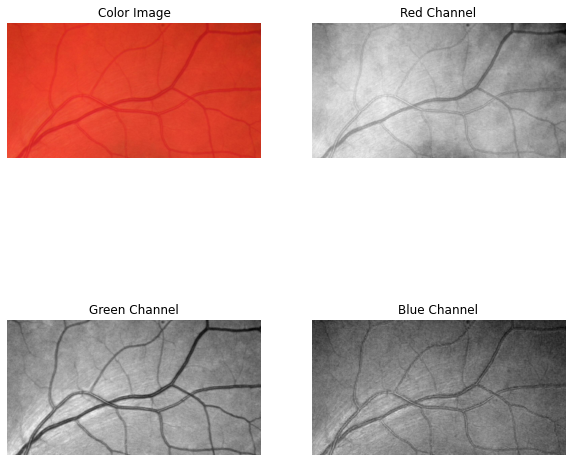

In [246]:
from skimage.util import img_as_ubyte
from skimage import io, color, img_as_float, filters, feature, util
import matplotlib.pylab as plt 
%matplotlib inline   

img_vessel = img_as_ubyte(io.imread('2067608/2067608_vesselimage.jpg'))

plt.figure(figsize=(10,10))
plt.subplot(2,2,1); plt.imshow(img_vessel); plt.title('Color Image'); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(img_vessel[:,:,0],cmap="gray"); plt.title('Red Channel'); plt.axis('off')
plt.subplot(2,2,3); plt.imshow(img_vessel[:,:,1],cmap="gray"); plt.title('Green Channel'); plt.axis('off')
plt.subplot(2,2,4); plt.imshow(img_vessel[:,:,2],cmap="gray"); plt.title('Blue Channel'); plt.axis('off')

2. (5 points) Convert the color image to HSV and display the hue, saturation and value channels.

   Points breakdown: 2 points for loading the image and 3 points for displaying with titles.

   **Report the steps you took briefly to denoise the image as comments in your code.**

(799, 1500, 3) float64 <class 'numpy.ndarray'>


(-0.5, 1499.5, 798.5, -0.5)

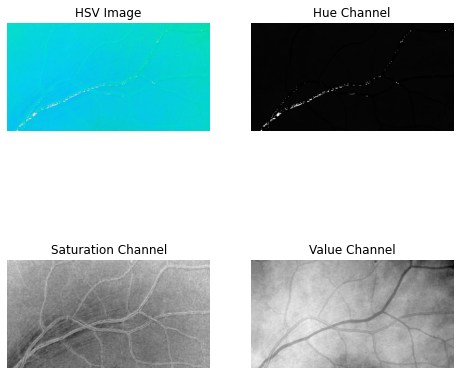

In [247]:
from skimage import io, color

vessel_img_hsv = color.rgb2hsv(img_vessel) # from RGB to HSV color space 
print(vessel_img_hsv.shape, vessel_img_hsv.dtype, type(vessel_img_hsv))

plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(vessel_img_hsv); plt.title('HSV Image'); plt.axis('off')
plt.subplot(222); plt.imshow(vessel_img_hsv[:,:,0], cmap = "gray"); plt.title('Hue Channel'); plt.axis('off')
plt.subplot(223); plt.imshow(vessel_img_hsv[:,:,1], cmap = "gray"); plt.title('Saturation Channel'); plt.axis('off')
plt.subplot(224); plt.imshow(vessel_img_hsv[:,:,2], cmap = "gray"); plt.title('Value Channel'); plt.axis('off')

3. (20 points) Segment the vessels to obtain a binary image where pixels representing the vessels are set to 1. You should compare two different image segmentation algorithms. You can apply morphological operations on these images.

   Points breakdown: Maximum of 10 points for each method. Comparing two thresholding algorithms only counts for 1 method. Report the steps you took to compute two image segmentation algorithms as comments in your code. Display the results of image processing at each step with appropriate titles. For each method: Full (10) points if each method successfully segments all the large vessels, most of the smaller vessels and none of the background. Show the results for each step you took. If the vessel shapes are slightly distorted or a 10% of the background is segmented or 50% of the smaller vessels are missing, you will get a maximum of 7 points each. If you make an attempt and the results are poor, you can get a maximum of 5 points each.

   **Report the steps you took to compute two image segmentation algorithms as comments in your code. Display the results of image processing at each step with appropriate titles.**

(-0.5, 1499.5, 798.5, -0.5)

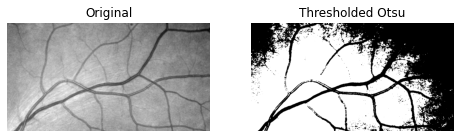

In [248]:
from skimage.morphology import opening, closing, disk, binary_opening, binary_closing, erosion, dilation
from skimage.color import rgb2gray, label2rgb
from skimage.filters import threshold_otsu
import numpy as np 

# Transform the image to a grayscale image
gray_vessel = rgb2gray(img_vessel)

# compute optimal threshold with otsu thresholding 
thresh = threshold_otsu(gray_vessel)
# threshold the image 
imbw= gray_vessel > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(gray_vessel, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(imbw, cmap=plt.cm.gray)
ax[1].set_title('Thresholded Otsu')
ax[1].axis('off')

# We can see that otsu treshold is good but image is black on the corner 

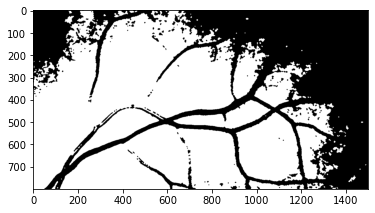

In [249]:
# Wcan see that otsu treshold is good but there is still black parts in the image

# We denoise the image by using median filter 
im_filtered = median(gray_vessel)

# Threshold the image to obtain a binary image 
im_binary = im_filtered > filters.threshold_otsu(im_filtered)

# Perform morphological operations to enhance the vessels
# Although we can see the big vessels clearly, disk 2 works the best in this case with many blacks on the image
se = disk(2) 
im_closed = binary_closing(im_binary, se)
im_opened = binary_opening(im_closed, se)

# Showing the binary image
plt.imshow(im_opened)
plt.show()

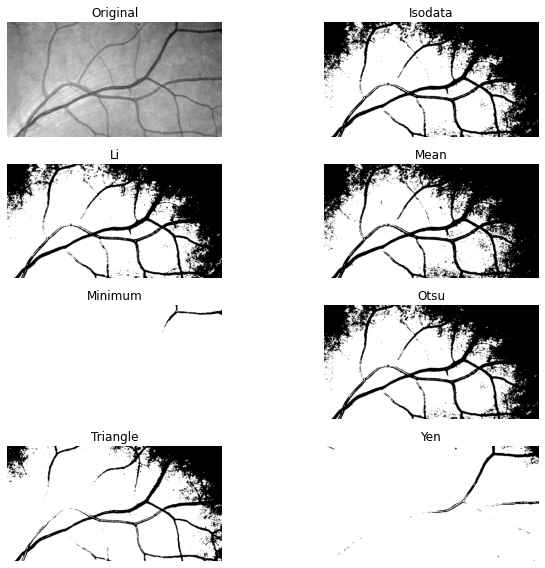

In [250]:
# try all thresholds 
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(gray_vessel, figsize=(10, 8), verbose=False)
plt.show()

Text(0.5, 1.0, 'Binary image of vessels')

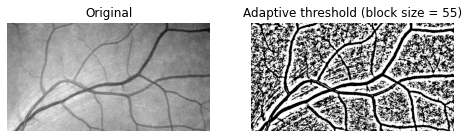

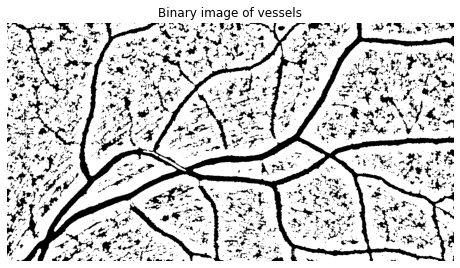

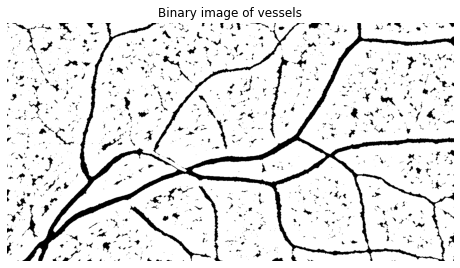

In [251]:
# There is some variation in the background intensity in the image. 
# Hence, adaptive thresholding (local or dynamic thresholding) may produce better results. 

from skimage import filters
from skimage.morphology import remove_small_objects
from skimage import filters

gray_vessel = gray_vessel.astype(float)
gray_vessel = gray_vessel-gray_vessel.min()
gray_vessel = gray_vessel/gray_vessel.max()
# set the blocksize for local thresholding algorithms.
block_size = 55

# filters.threshold_local creates a numpy array with the same height and width of gray_vessel
# each pixel in gray_vessel is threshold
imbw2 = gray_vessel > filters.threshold_local(gray_vessel, block_size,method = 'mean')
# Threshold the image to obtain a binary image 
im_binary1 = imbw2 > filters.threshold_otsu(imbw2)
im_binary = binary_dilation(im_binary1, disk(2))

# remove objects less than 300 pixels 
imbw3 = remove_small_objects(im_binary, 300, connectivity=1)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.imshow(gray_vessel, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(imbw2, cmap='gray')
plt.title('Adaptive threshold (block size = 55)')
plt.axis('off')
plt.figure(figsize = (8,8))
plt.imshow(imbw3, cmap='gray')
plt.axis('off')
plt.title('Binary image of vessels')


# Applying these steps to otsu threshold instead of local to see which vessels looks better
# In general, the Otsu thresholding method performs better for larger kernels 
# because it takes into account the distribution of intensities in the image as a whole, 
# whereas local thresholding only considers the local neighborhood of each pixel. 
# This means that local thresholding can be sensitive to noise and other artifacts in the image.


im_show = binary_dilation(imbw3,se)
plt.figure(figsize = (8,8))
plt.imshow(im_show, cmap='gray')
plt.axis('off')
plt.title('Binary image of vessels')

4. (5 points) Overlay your segmentation solutions with the binary mask (manual annotation results).
   **Display the resulting images with appropriate titles.**

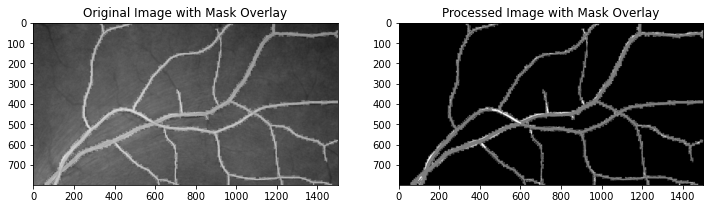

In [252]:
# load the manual mask and convert to binary
manual_mask = io.imread('2067608/2067608_vesselmask.jpg')
manual_mask_binary = manual_mask > 0

# create a figure with two subplots
fig = plt.figure(figsize=(12, 6))

# show the original image and the processed image with manual mask overlay
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(vessel_img_gray, cmap='gray')
ax1.imshow(manual_mask_binary, cmap='gray', alpha=0.5)
ax1.set_title('Original Image with Mask Overlay')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(imbw3_masked, cmap='gray')
ax2.imshow(manual_mask_binary, cmap='gray', alpha=0.5)
ax2.set_title('Processed Image with Mask Overlay')

# display the figure
plt.show()

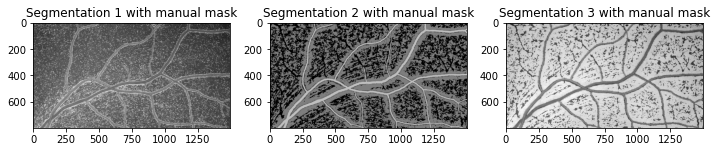

In [253]:
vessel_img = io.imread('2067608/2067608_vesselimage.jpg')
vessel_img_gray = color.rgb2gray(vessel_img)

# perform edge detection and binarize the image using Otsu's thresholding
edges = filters.sobel(vessel_img_gray)
thresh = filters.threshold_otsu(edges)
imbw = edges > thresh

# read the manual mask and convert to binary
manual_mask = io.imread('2067608/2067608_vesselmask.jpg')
manual_mask_binary = manual_mask > 0

# overlay the first segmentation solution with the manual mask
overlay1 = np.zeros_like(vessel_img_gray)
overlay1[imbw] = 1
overlay1[manual_mask_binary] = 0.5

# overlay the second segmentation solution with the manual mask
overlay2 = np.zeros_like(vessel_img_gray)
overlay2_gray[imbw2] = 1
overlay2_gray[manual_mask_binary] = 0.5

# overlay the third segmentation solution with the manual mask
overlay3 = np.zeros_like(vessel_img_gray)
overlay3[imbw3] = 1
overlay3[manual_mask_binary] = 0.5

# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# show the original image and the first segmentation solution
ax1.imshow(vessel_img_gray, cmap='gray')
ax1.imshow(overlay1, cmap='gray', alpha=0.5)
ax1.set_title('Segmentation 1 with manual mask')

# show the original image and the second segmentation solution
ax2.imshow(manual_mask, cmap='gray')
ax2.imshow(overlay2_gray, cmap='gray', alpha=0.5)
ax2.set_title('Segmentation 2 with manual mask')

# show the original image and the third segmentation solution
ax3.imshow(vessel_img_gray, cmap='gray')
ax3.imshow(overlay3, cmap='gray', alpha=0.5)
ax3.set_title('Segmentation 3 with manual mask')

# display the figure
plt.show()

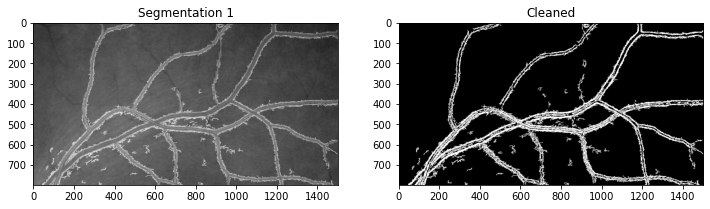

In [254]:
from skimage import io, color, filters, morphology
from skimage.measure import label, regionprops
from skimage.segmentation import clear_border
import numpy as np
import matplotlib.pyplot as plt

# load the vessel image and convert to grayscale
vessel_img = io.imread('2067608/2067608_vesselimage.jpg')
vessel_img_gray = color.rgb2gray(vessel_img)

# perform edge detection and binarize the image using Otsu's thresholding
edges = filters.sobel(vessel_img_gray)
thresh = filters.threshold_otsu(edges)
imbw = edges > thresh

# remove small objects from the binary image
cleaned = morphology.remove_small_objects(imbw, min_size=100)

# read the manual mask and convert to binary
manual_mask = io.imread('2067608/2067608_vesselmask.jpg')
manual_mask_binary = manual_mask > 0

# overlay the first segmentation solution with the manual mask
overlay1 = np.zeros_like(vessel_img_gray)
overlay1[cleaned] = 1
overlay1[manual_mask_binary] = 0.5

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# show the original image and the first segmentation solution
ax1.imshow(vessel_img_gray, cmap='gray')
ax1.imshow(overlay1, cmap='gray', alpha=0.5)
ax1.set_title('Segmentation 1')

# show the manual mask
ax2.imshow(cleaned, cmap='gray')
ax2.set_title('Cleaned')

# display the figure
plt.show()


5. (5 points) Compute the Dice or Jaccard score between your solution and the binary mask.


In [255]:
from skimage import io, color, filters, morphology
import numpy as np

# Source code: https://towardsdatascience.com/how-accurate-is-image-segmentation-dd448f896388
def dice_metric(inputs, target):
    intersection = 2.0 * (target * inputs).sum()
    union = target.sum() + inputs.sum()
    if target.sum() == 0 and inputs.sum() == 0:
        return 1.0

    return intersection / union

# calculate the Dice or Jaccard score between the first segmentation solution and the binary mask
score1 = dice_metric(overlay1, manual_mask_binary)
print(f"Segmentation 1 Dice/Jaccard score: {score1}")

score3 = dice_metric(overlay3, manual_mask_binary)
print(f"Segmentation 3 Dice/Jaccard score: {score3}")

Segmentation 1 Dice/Jaccard score: 0.486187492415097
Segmentation 3 Dice/Jaccard score: 0.10571714411769743


## Part 3: Extracting vessels from raw fundus images

1. (2 points) Remove smaller vessels (less than 8 pixels wide) with morphological opening (after you load the image).

Text(0.5, 1.0, 'Image after Opening')

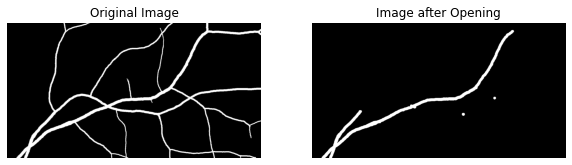

In [256]:
import skimage
from skimage.morphology import disk, binary_erosion, thin
from skimage import io
from skimage.util import img_as_ubyte
from skimage.morphology import binary_opening, disk
import matplotlib.pylab as plt
%matplotlib inline

# Read the mask image
img_vesselmask = skimage.io.imread('2067608/2067608_vesselmask.jpg')

# Opening Operation
# Setting disk to 8 we removed all smaller vessels less than 8 pixels
vesselmask_opened = binary_opening(img_vesselmask,disk(8.2))

# Display the results
plt.figure (figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(img_vesselmask,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(vesselmask_opened,cmap='gray')
plt.axis('off')
plt.title('Image after Opening')

2. (3 points) Apply morphological thinning to obtain a 1 pixel thin centerline of the vascular network.

Text(0.5, 1.0, 'Eroded Image\nafter Thinning')

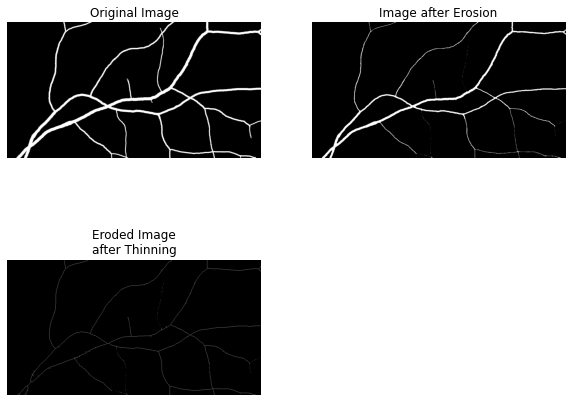

In [257]:
from skimage.morphology import skeletonize, thin

# Erode Original Image using disk with radius=3
eroded = binary_erosion(img_vesselmask,disk(3))

# Thinning Operation
thinned = thin(eroded)

# Displaying the images 
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(img_vesselmask,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(eroded,cmap='gray')
plt.axis('off')
plt.title('Image after Erosion')
plt.subplot(2,2,3)
plt.imshow(thinned,cmap='gray')
plt.axis('off')
plt.title('Eroded Image\nafter Thinning')

3. (5 points) Find overall length of the vascular network in the image after thinning.

In [258]:
from skimage.measure import perimeter

# The length of the vascular network
print(f'The overall length of the vascular network is {perimeter(thinned):.2f} pixels.')

The overall length of the vascular network is 7415.10 pixels.


4. (5 points) Find the length of the vascular network which is wider than 40 pixels. In other words, find the total length of all the vessels which are wider than 40 pixels. Hint: You can apply a medial axis transforms to compute the width of the vessel for the pixels of the skeleton

In [259]:
from skimage.morphology import medial_axis

skel, distance = medial_axis(thinned, return_distance=True)

# compute width of each pixel of the skeleton
width = 2 * ndi.distance_transform_edt(skel) * distance

# create binary image where all pixels with width greater than 40 are set to 1
img_wider_than_40 = width > 40

# compute the length of the vascular network with width greater than 40 pixels
length_wider_than_40 = np.sum(img_wider_than_40)

print("Length of vascular network wider than 40 pixels:", length_wider_than_40)

Length of vascular network wider than 40 pixels: 0


5. (5 points) Computer orientation of the vascular network in the image after thinning. Display the orientation distribution of the vascular network in a polar (rose) plot.

(20,) [ 9  1  2  2  1  0  0  0  1  1  0  2  1  2  2  3  2  4  1 16]


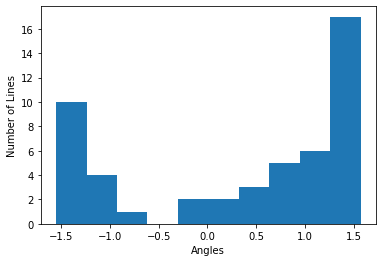

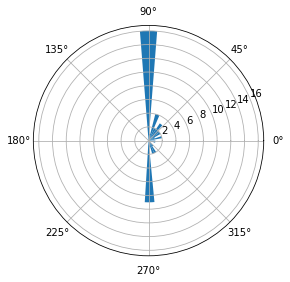

In [260]:
from skimage import feature
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks, probabilistic_hough_line

img = img_as_ubyte(io.imread("2067608/2067608_vesselmask.jpg"))

# Canny Edge Detection
img_edges = feature.canny(img, sigma=2, low_threshold =10, high_threshold = 50)

# Hough Transforms for lines on the edge detection
[H, theta, rho]=hough_line(img_edges);
hspace, angles, dists = hough_line_peaks (H, theta, rho, num_peaks =50)

# Display the results 
fig = plt.figure()
plt.hist(angles)
plt.xlabel("Angles")
plt.ylabel("Number of Lines")

# Display the histogram as a polar (rose) plot
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8,0.8], polar = True)
rad=np.histogram(angles, bins=20)
theta_1 = np.linspace(min(angles), max(angles), 20)
print(theta_1.shape, rad[0])

bars = plt.bar(theta_1, rad[0], width = np.pi/N, bottom = 0.0)

6. (5 points) Compute the length and orientation of each branch (e.g. with the sknw package (https://github.com/Image-Py/sknw)).

Note: you may need to restart the kernel to use updated packages.
Length: 156.60, Orientation: 20.17 degrees
Length: 2.83, Orientation: 135.00 degrees
Length: 7.28, Orientation: 15.95 degrees
Length: 54.34, Orientation: 102.76 degrees
Length: 20.62, Orientation: 39.09 degrees
Length: 49.04, Orientation: 92.34 degrees
Length: 64.44, Orientation: 48.14 degrees
Length: 20.52, Orientation: 46.97 degrees
Length: 113.45, Orientation: 49.29 degrees
Length: 300.03, Orientation: 179.24 degrees
Length: 77.03, Orientation: 60.44 degrees
Length: 15.56, Orientation: 135.00 degrees
Length: 3.61, Orientation: 123.69 degrees
Length: 5.00, Orientation: 53.13 degrees
Length: 4.24, Orientation: 45.00 degrees
Length: 55.61, Orientation: 52.31 degrees
Length: 2.24, Orientation: 116.57 degrees
Length: 3.16, Orientation: 108.43 degrees
Length: 60.54, Orientation: 30.80 degrees
Length: 196.31, Orientation: 81.21 degrees
Length: 5.10, Orientation: 168.69 degrees
Length: 65.39, Orientation: 66.57 degrees
Length

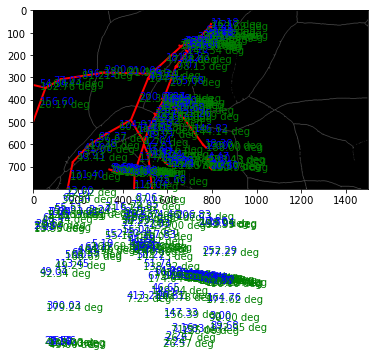

In [261]:
%pip install sknw

import sknw

#np.seterr(divide='ignore', invalid='ignore')

graph = sknw.build_sknw(thinned)

# Loop through each branch in the graph and compute its length and orientation
for (s, e) in graph.edges():
    # Get the pixel coordinates of the start and end points of the branch
    (x1, y1) = graph[s][e]['pts'][0]
    (x2, y2) = graph[s][e]['pts'][-1]
    
    # Compute the length of the branch using the Euclidean distance formula
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    # Compute the orientation of the branch using arctan2
    angle = np.arctan2(y2 - y1, x2 - x1)
    
    # Convert the angle to degrees and shift it by 90 degrees to align with the x-axis
    angle_deg = np.rad2deg(angle) + 90
    
    # Print the length and orientation of the branch
    print('Length: {:.2f}, Orientation: {:.2f} degrees'.format(length, angle_deg))
    
    # Optional: visualize the graph with branch length and orientation
    plt.plot([x1, x2], [y1, y2], 'r', linewidth=2)
    plt.text((x1 + x2) / 2, (y1 + y2) / 2, '{:.2f}'.format(length), color='b')
    plt.text((x1 + x2) / 2, (y1 + y2) / 2 + 10, '{:.2f} deg'.format(angle_deg), color='g')
plt.imshow(thinned, cmap='gray')
plt.show()
